In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# use paper style
style = "/home/gleung/scripts/styles/bee-paperlight.mplstyle"
# style = '/home/gleung/scripts/styles/bee-presentationtransparent.mplstyle'
plt.style.use(style)

# palettable default colors
from palettable.cartocolors.qualitative import Prism_8

prism = Prism_8.mpl_colors
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
orange = prism[6]
yellow = prism[5]
gray = "#303039"
bg = "white"
lcol = "black"

from palettable.cmocean.sequential import Ice_20

cloud = mcolors.ListedColormap(Ice_20.mpl_colors[4:])
cloud.set_bad(Ice_20.mpl_colors[4])
cloud.set_under(Ice_20.mpl_colors[4])

# set default font
font_dir = ["/home/gleung/scripts/futura"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams["font.family"] = "Futura"

import re

In [2]:
import os
import pandas as pd
import numpy as np
import xarray as xr

# Task 1: initialize perturbation

In [37]:
dataPath = "../../bin"

In [38]:
def read_mac_output(path):
    coords = []
    datas = []
    names = []

    with open(path) as file:
        file = file.readlines()

        breaks = []

        for i, f in enumerate(file):
            if "var" in f:
                breaks.append((i, f.strip().strip("var ")))
            elif "zsn" in f:
                zs = np.array(file[i + 1].split(", "), dtype="float")
            elif "xsn" in f:
                xs = np.array(file[i + 1].split(", "), dtype="float")
        for i in range(len(breaks)):
            name = breaks[i][1].strip("var")

            start = breaks[i][0] + 1
            if i < len(breaks) - 1:
                stop = breaks[i + 1][0]
            else:
                stop = len(file)

            data = file[start:stop]
            data = np.array([d.strip().split(",") for d in data], dtype="float")

            datas.append(data)
            names.append(name)

    ds = xr.Dataset(
        data_vars={names[i]: (["z", "x"], datas[i]) for i in range(len(names))},
        coords={"x": xs, "z": zs},
    )

    return ds

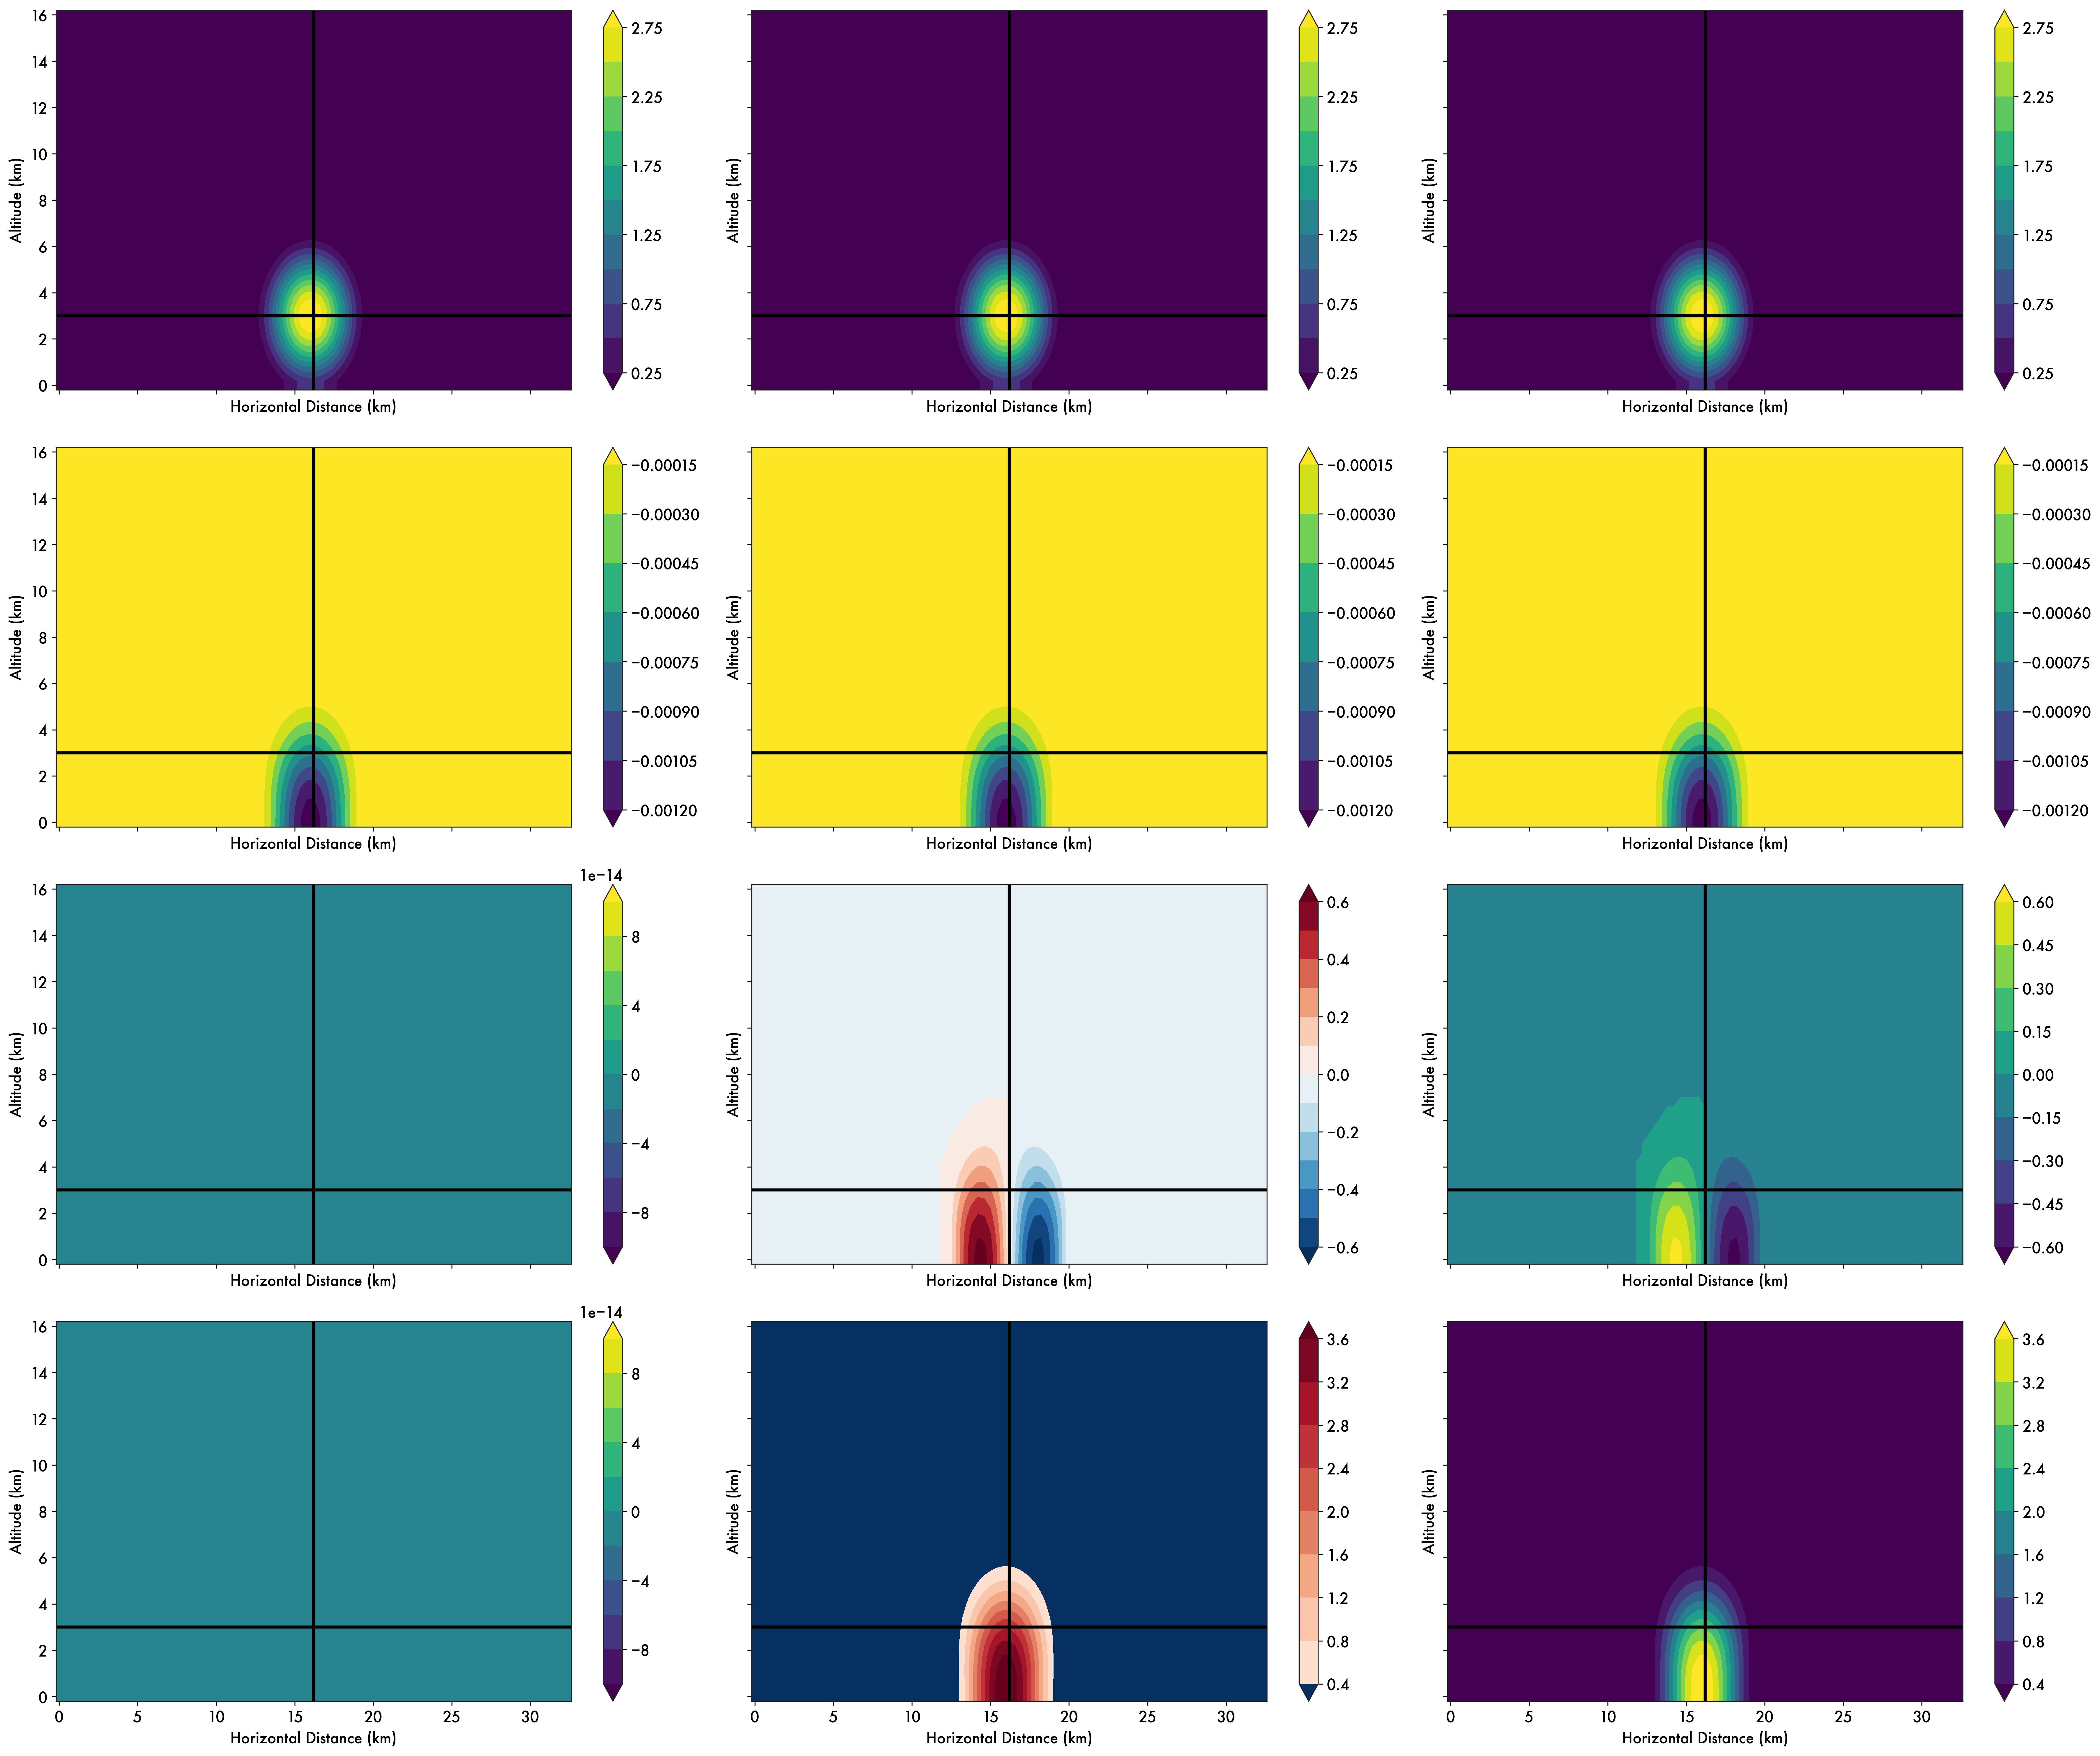

In [122]:
path = f"{dataPath}/hw4_output_timestep_1.txt"
ds = read_mac_output(path)

fig, axes = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(24, 20))
axes = axes.flatten()


for ax, var in zip(
    axes.flatten(),
    [
        "THP_past",
        "THP_pres",
        "THP_fut",
        "PIP_past",
        "PIP_pres",
        "PIP_fut",
        "UP_past",
        "UP_pres",
        "UP_fut",
        "WP_past",
        "WP_pres",
        "WP_fut",
    ],
):
    if (var == "UP_pres") or (var == "WP_pres"):
        norm = mcolors.TwoSlopeNorm(vcenter=0)
        cmap = "RdBu_r"
        levels = 12
    else:
        norm = None
        cmap = None
        levels = 11

    c = ax.contourf(
        ds.x / 1000,
        ds.z / 1000,
        ds[var],
        levels=levels,
        extend="both",
        norm=norm,
        cmap=cmap,
    )
    plt.colorbar(c, ax=ax)

    ax.set_ylabel("Altitude (km)")
    ax.set_xlabel("Horizontal Distance (km)")

    ax.axvline((ds.x.max() + ds.x.min()) / 2000)
    ax.axhline(300)

plt.show()

In [150]:
# test if symmetric

path = f"{dataPath}/hw4_output_timestep_80.txt"
ds = read_mac_output(path)

for var in ["UP_pres", "UP_TEND_pres"]:
    print(
        var,
        np.max(
            ds[var].isel(x=slice(0, 41)).values
            + ds[var].isel(x=slice(42, 84)).values[::, ::-1]
        ),
    )

for v in ["WP", "THP", "PIP"]:
    for var in [f"{v}_pres", f"{v}_TEND_pres"]:
        print(
            var,
            np.max(
                ds[var].isel(x=slice(0, 40)).values
                - ds[var].isel(x=slice(42, 82)).values[::, ::-1]
            ),
        )

UP_pres 0.0
UP_TEND_pres 0.0
WP_pres 0.0
WP_TEND_pres 0.0
THP_pres 0.004040999999999961
THP_TEND_pres 0.00101011582
PIP_pres 0.00021033940000000006
PIP_TEND_pres 5.258487e-05


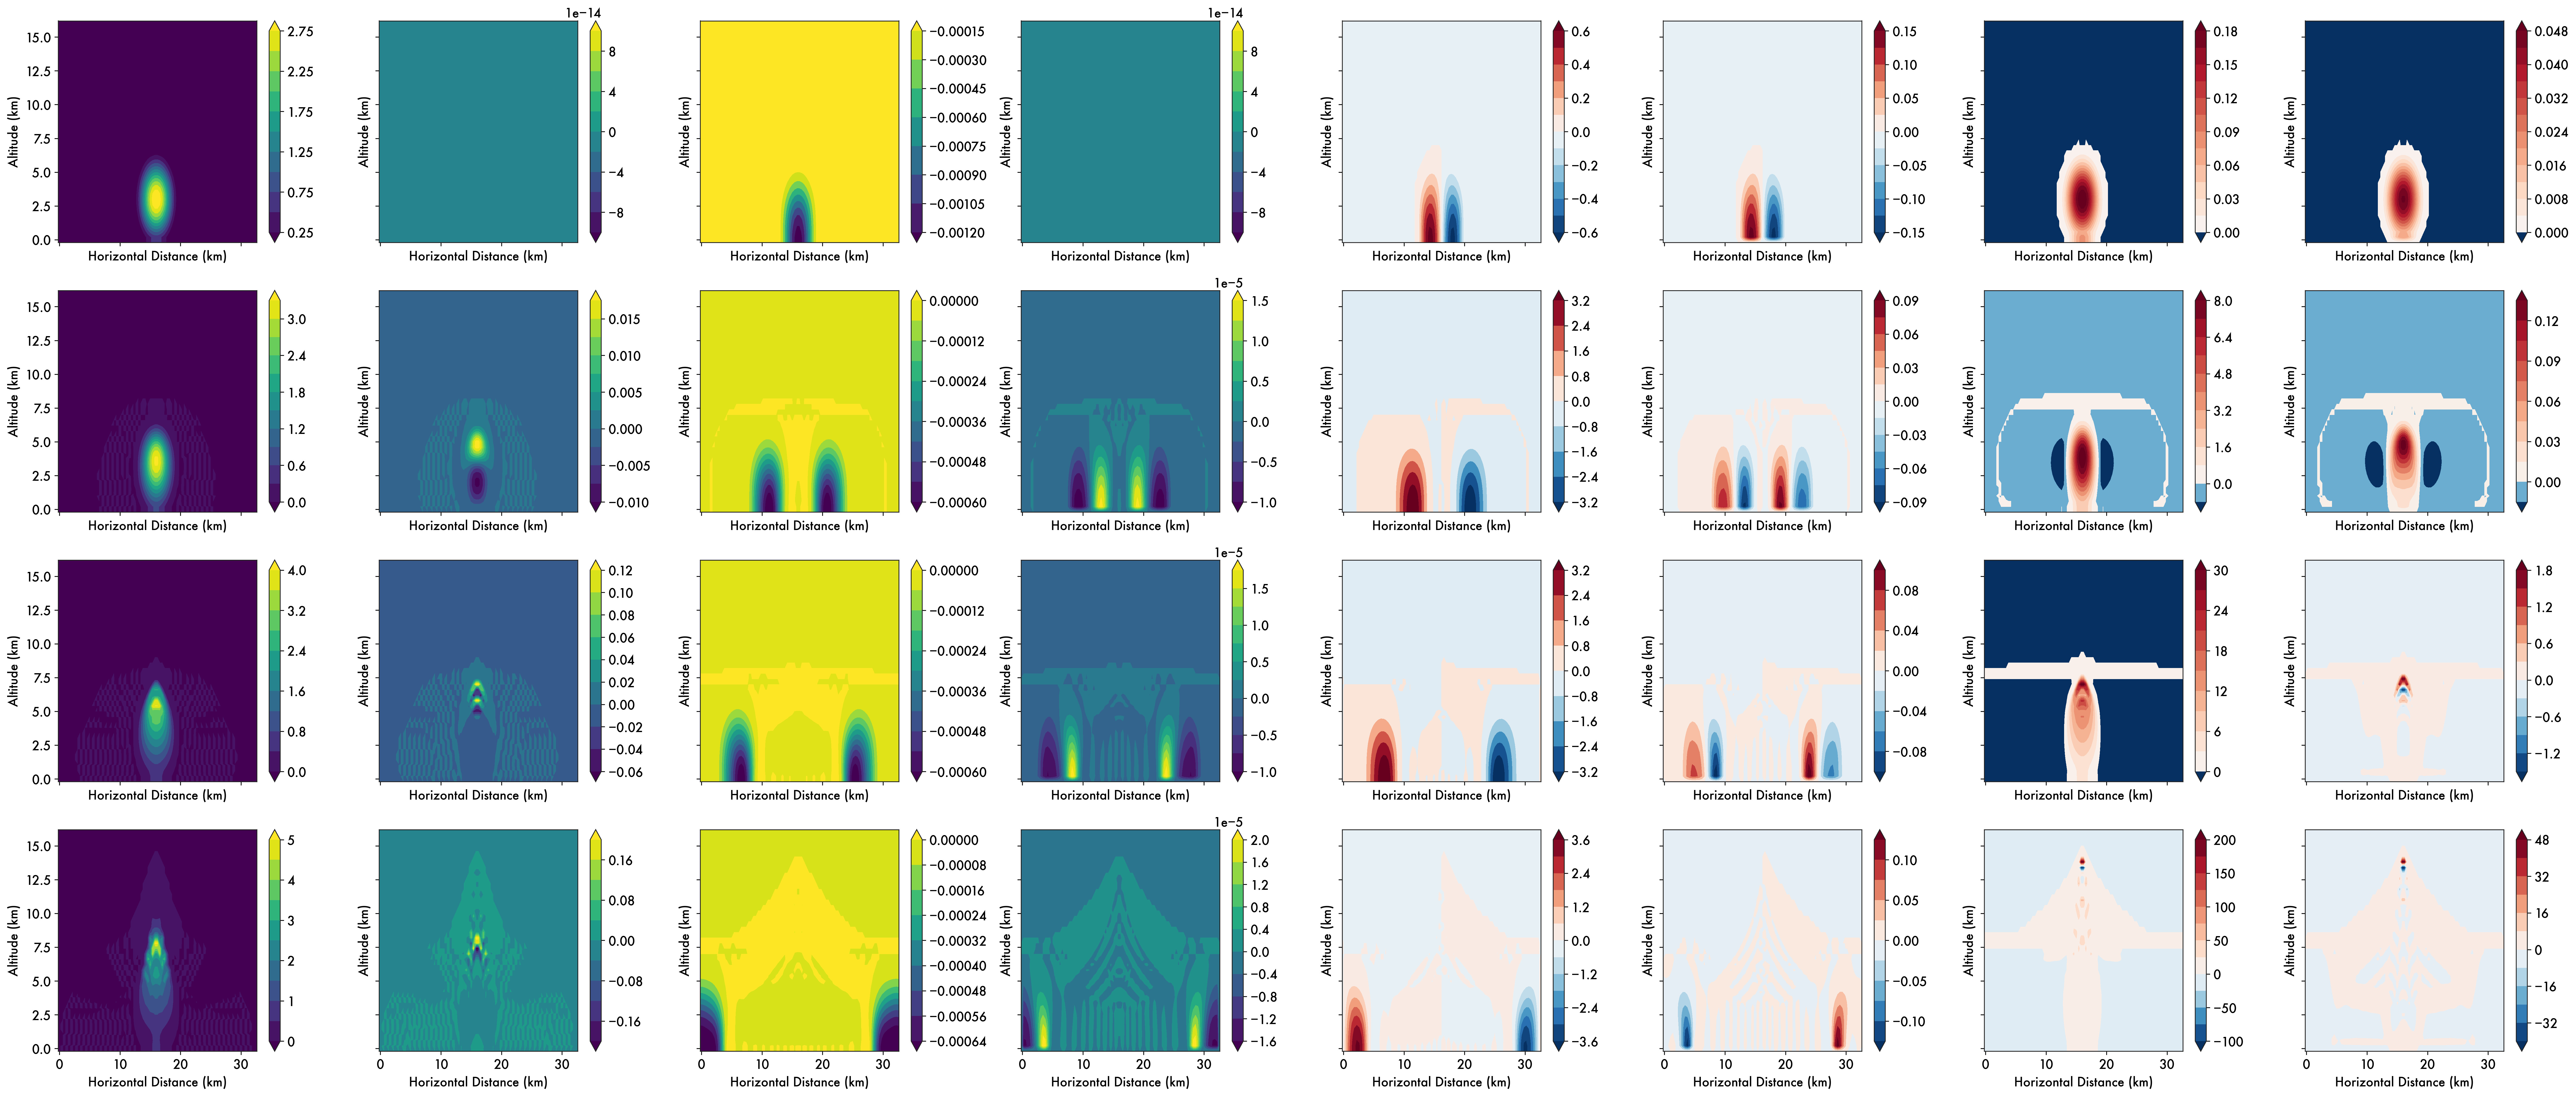

In [248]:
fig, axess = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(35, 15))

for name, axes in zip([1, 50, 100, 150], axess):
    path = f"{dataPath}/hw4_output_timestep_{name}.txt"

    ds = read_mac_output(path)
    for ax, var in zip(
        axes,
        [
            "THP_pres",
            "THP_TEND_pres",
            "PIP_pres",
            "PIP_TEND_pres",
            "UP_pres",
            "UP_TEND_pres",
            "WP_pres",
            "WP_TEND_pres",
        ],
    ):

        if ("UP" in var) or ("WP" in var):
            norm = mcolors.TwoSlopeNorm(vcenter=0)
            cmap = "RdBu_r"
            levels = 12
        else:
            norm = None
            cmap = None
            levels = 11

        c = ax.contourf(
            ds.x / 1000,
            ds.z / 1000,
            ds[var],
            levels=levels,
            extend="both",
            norm=norm,
            cmap=cmap,
        )
        plt.colorbar(c, ax=ax)

        ax.set_ylabel("Altitude (km)")
        ax.set_xlabel("Horizontal Distance (km)")

plt.show()

In [252]:
np.arange(-10, 10.5, 0.5)

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5,  10. ])

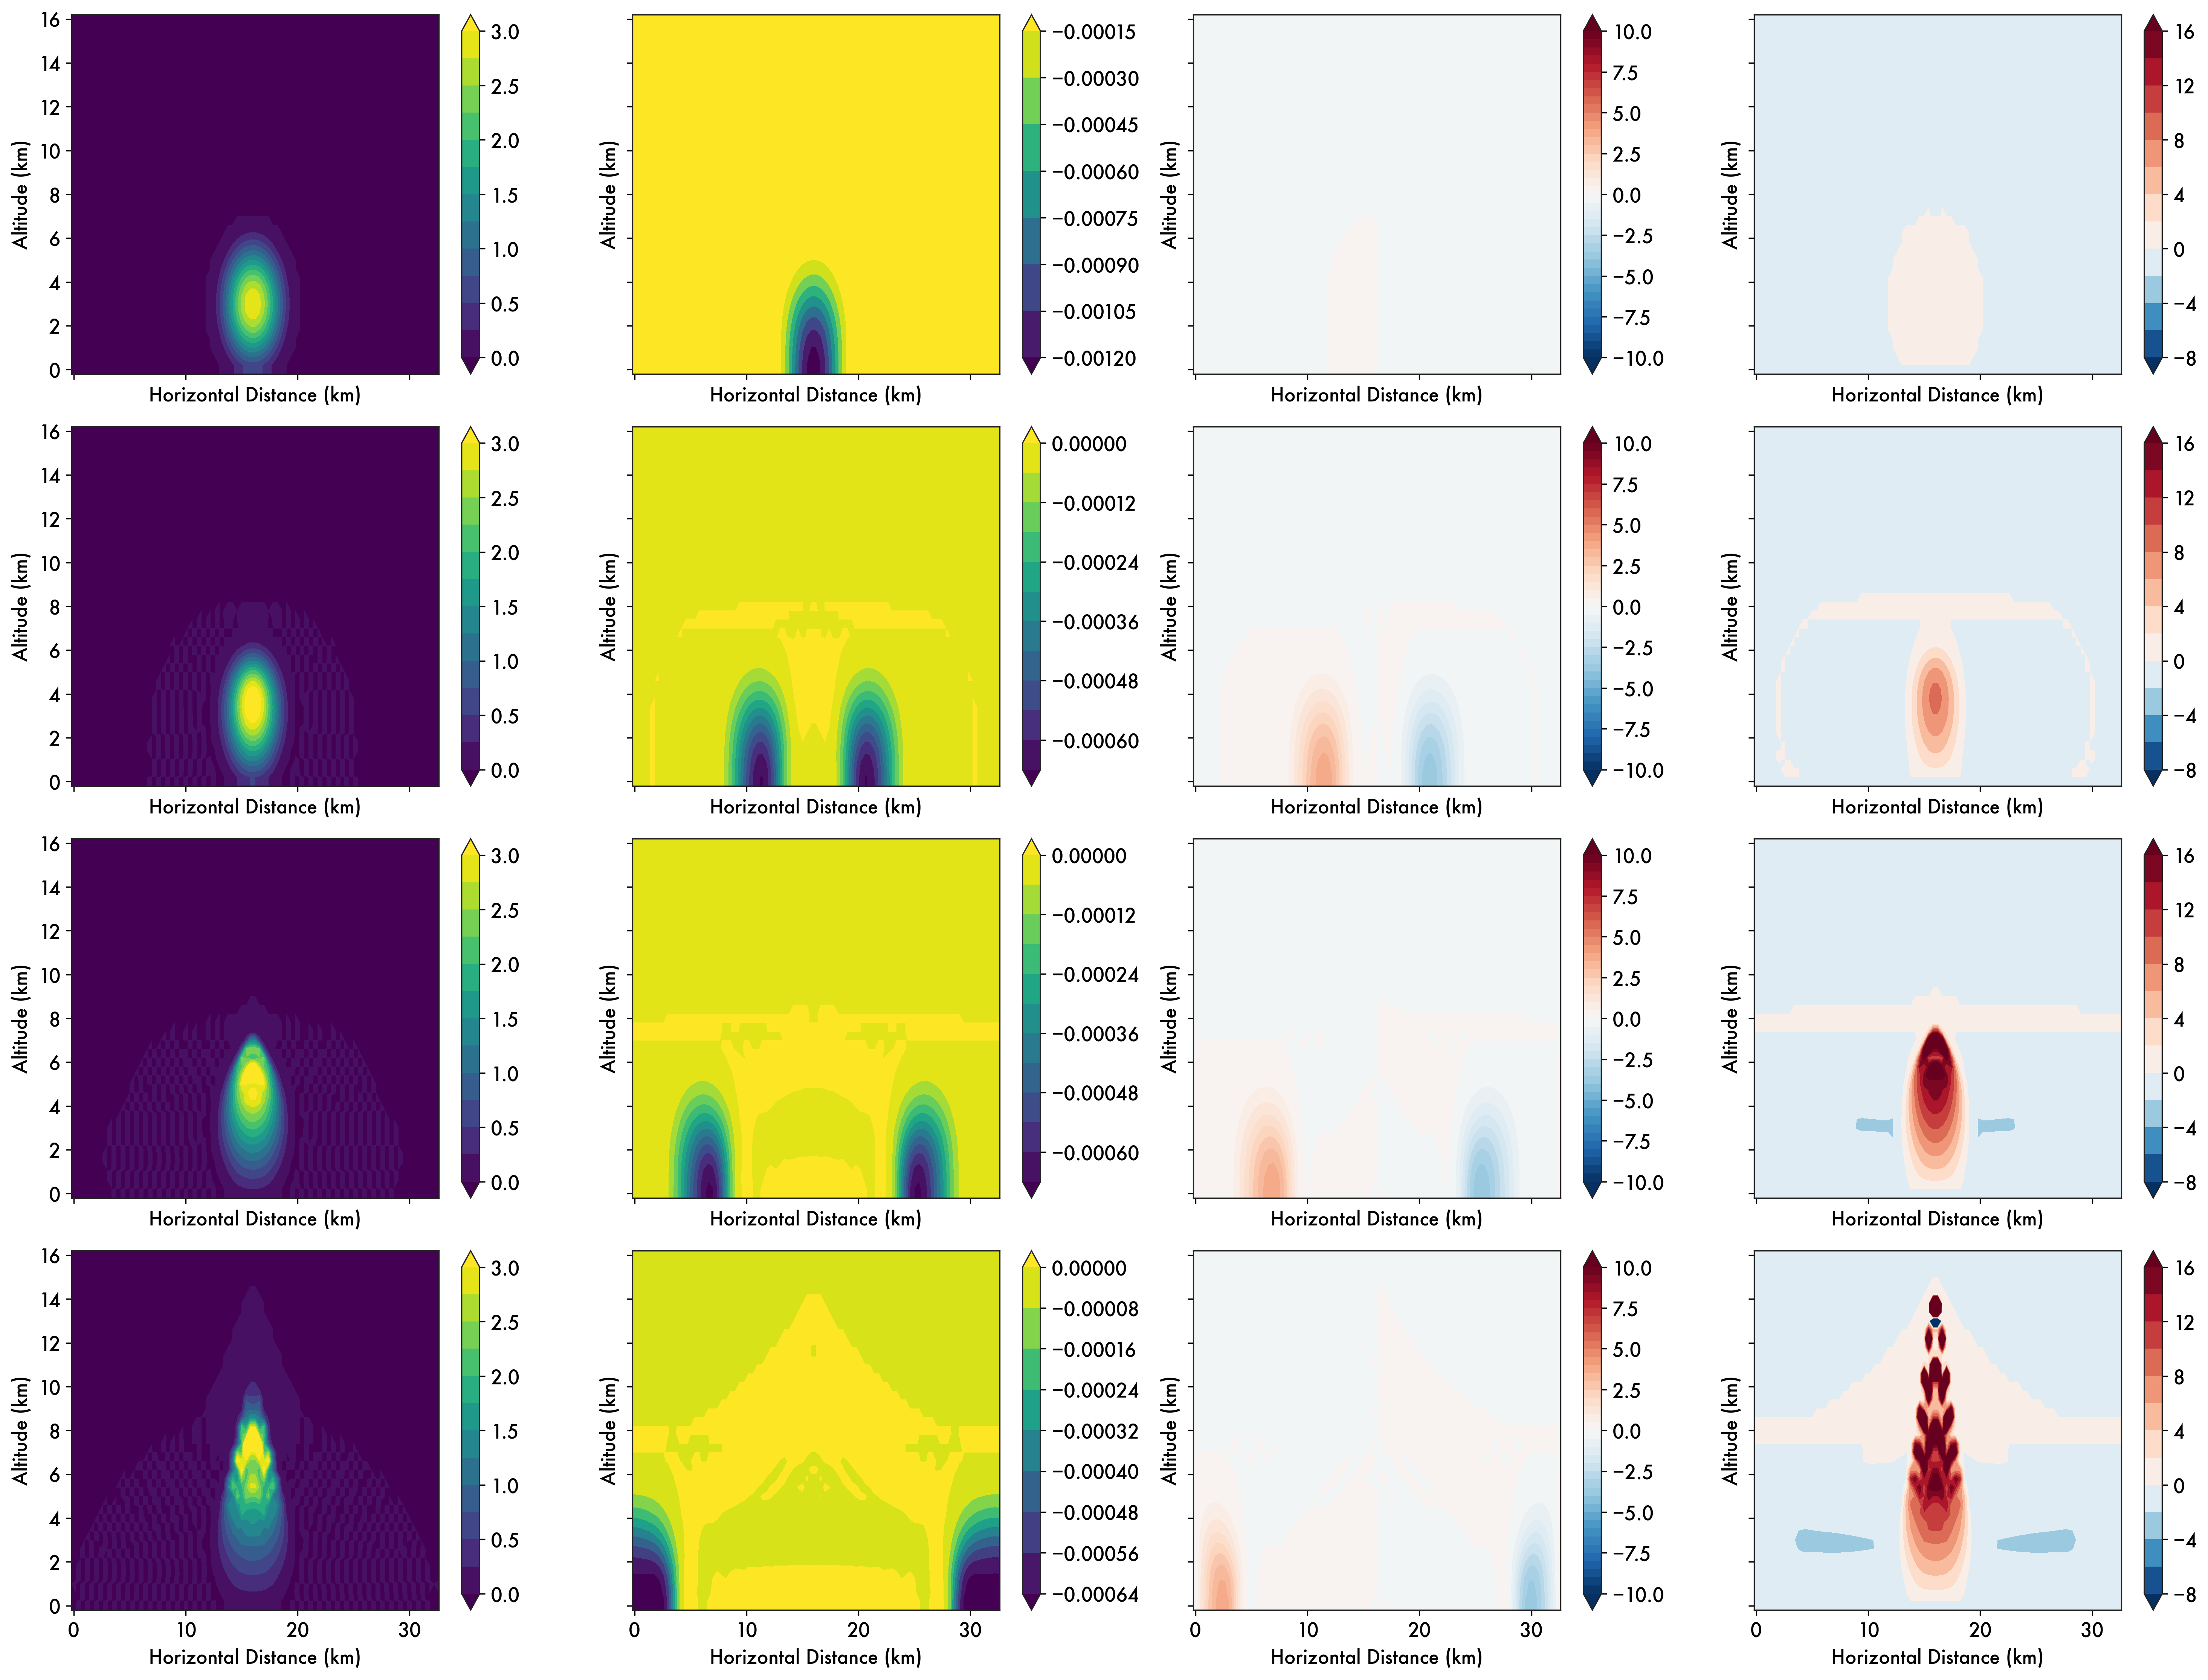

In [259]:
fig, axess = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(20, 15))

for name, axes in zip([1, 50, 100, 150], axess):
    path = f"{dataPath}/hw4_output_timestep_{name}.txt"

    ds = read_mac_output(path)
    for ax, var, levels in zip(
        axes,
        [
            "THP_pres",
            "PIP_pres",
            "UP_pres",
            "WP_pres",
        ],
        [
            np.arange(0, 3.25, 0.25),
            11,
            np.arange(-10, 10.5, 0.5),
            np.arange(-8, 17, 2),
        ],
    ):

        if ("UP" in var) or ("WP" in var):
            norm = mcolors.TwoSlopeNorm(vcenter=0)
            cmap = "RdBu_r"
        else:
            norm = None
            cmap = None

        c = ax.contourf(
            ds.x / 1000,
            ds.z / 1000,
            ds[var],
            levels=levels,
            extend="both",
            norm=norm,
            cmap=cmap,
        )
        plt.colorbar(c, ax=ax)

        ax.set_ylabel("Altitude (km)")
        ax.set_xlabel("Horizontal Distance (km)")

plt.show()

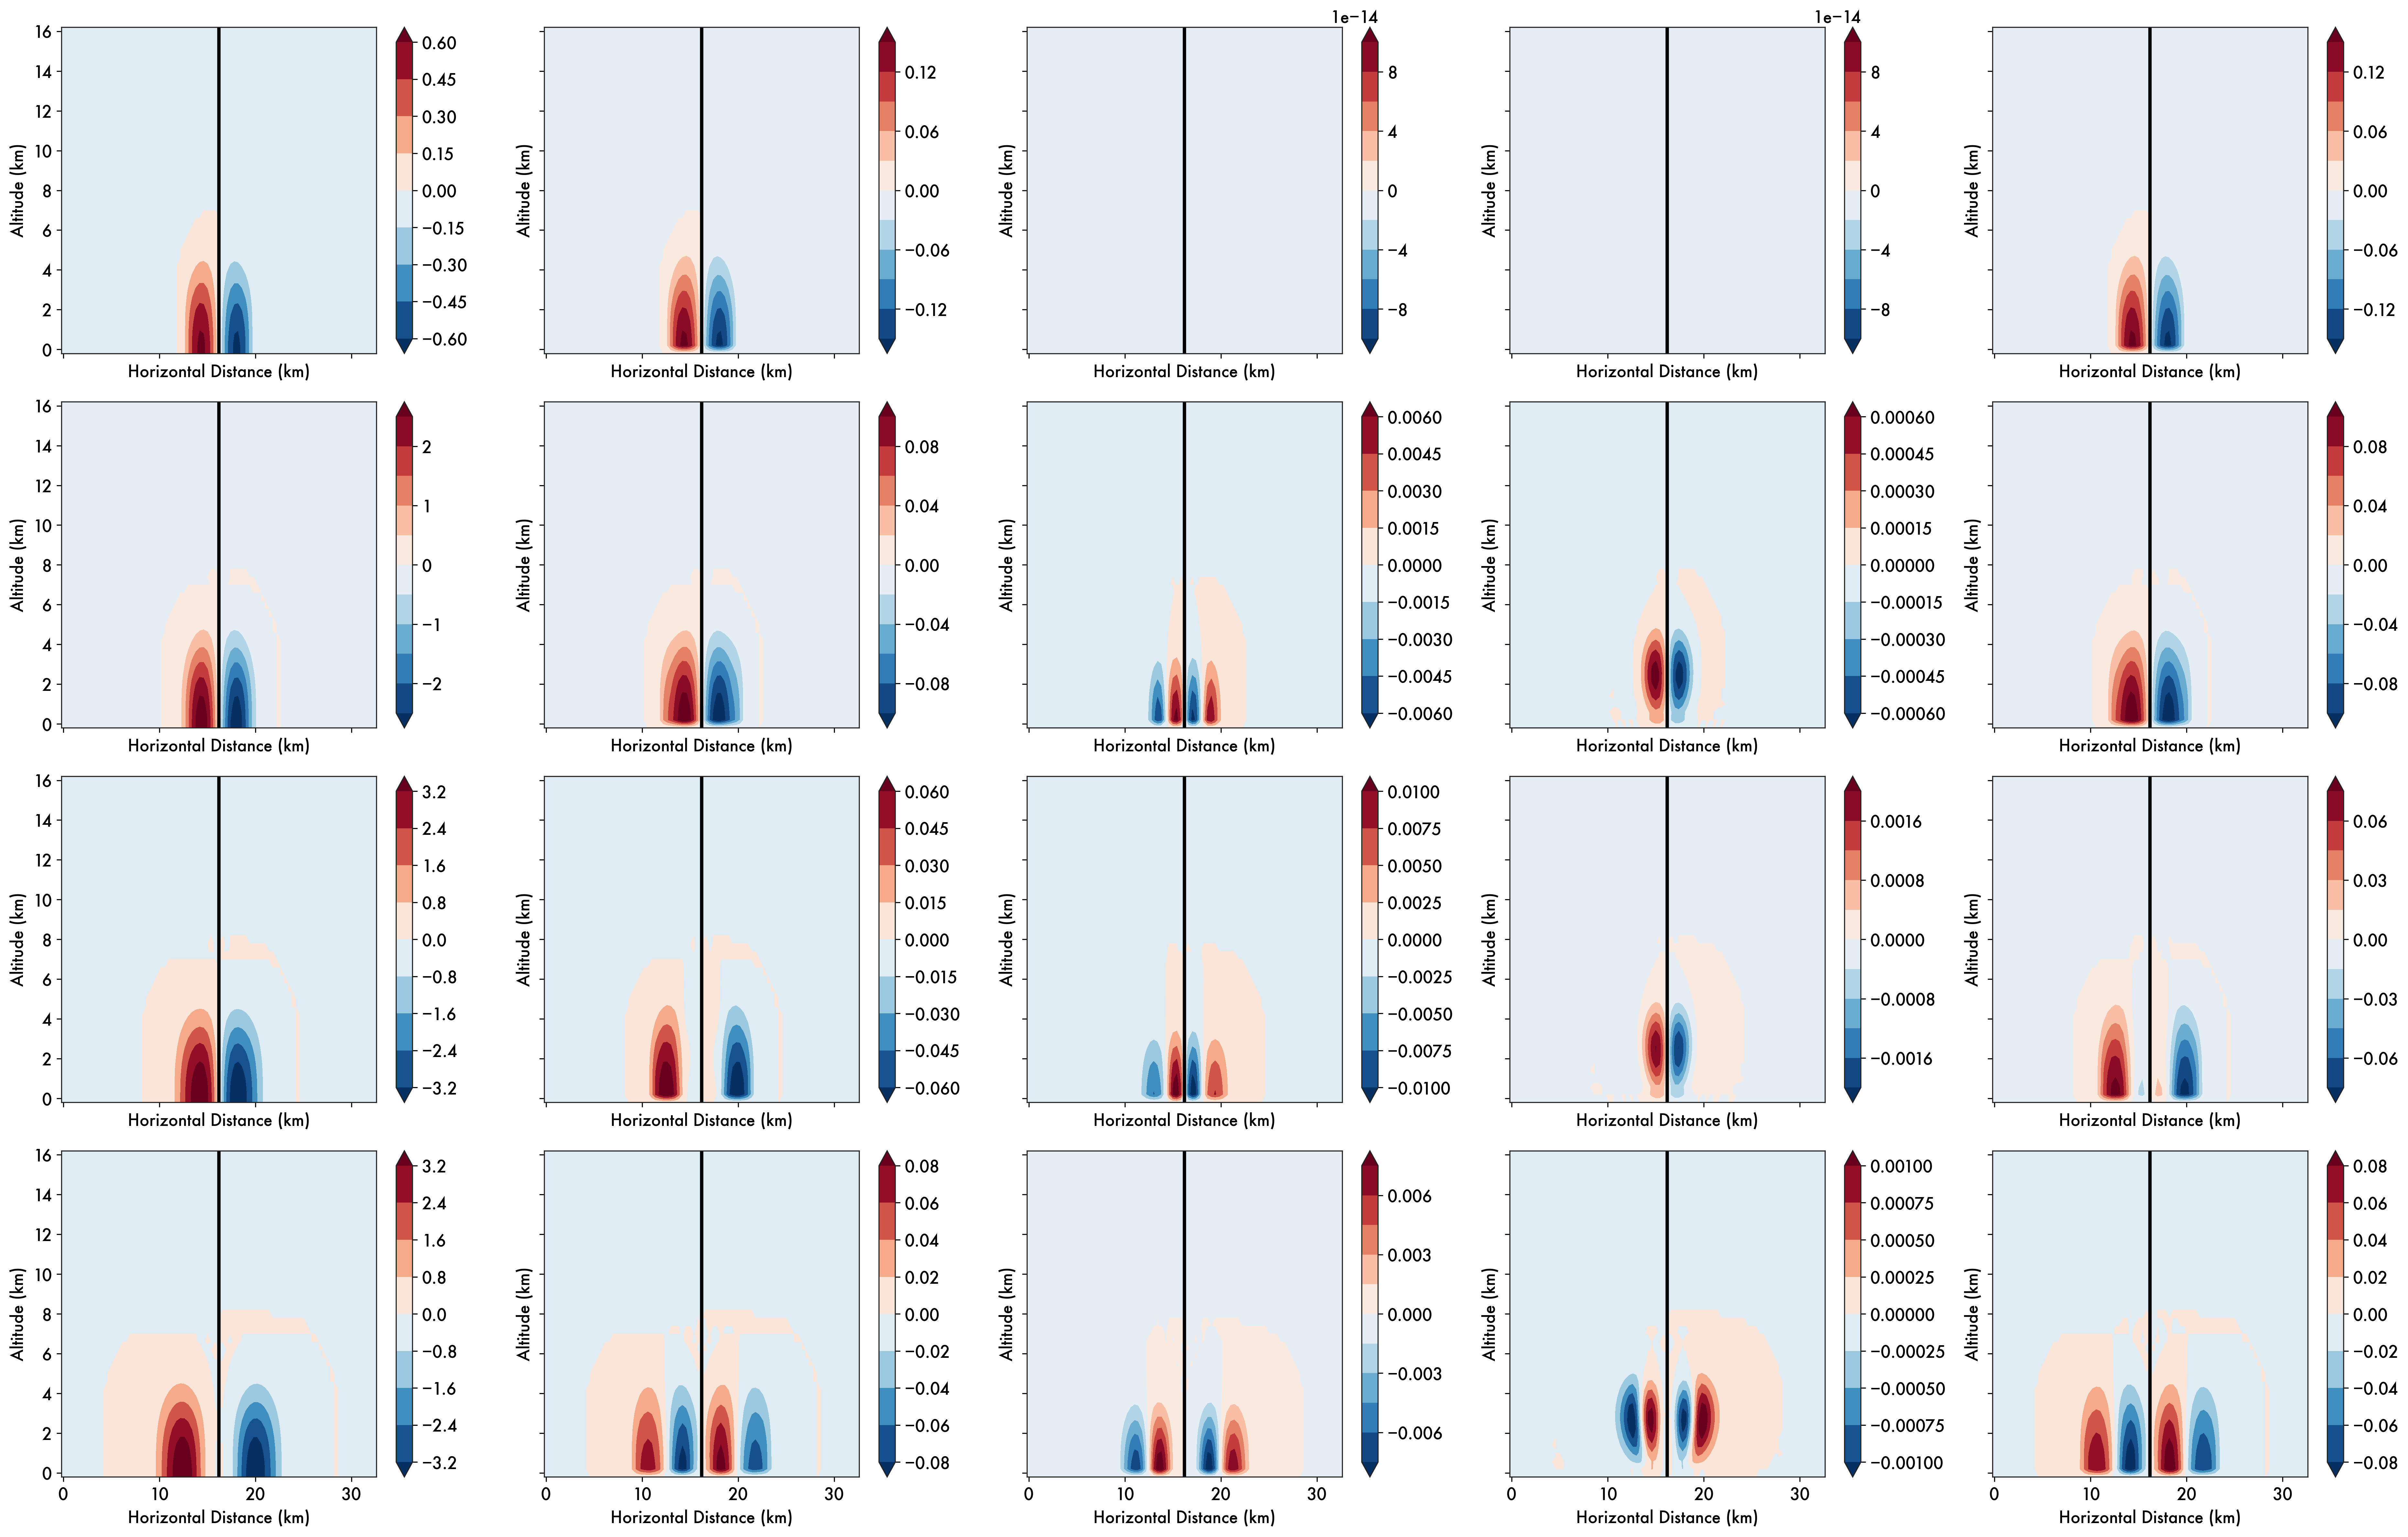

In [246]:
fig, axess = plt.subplots(4, 5, sharex=True, sharey=True, figsize=(25, 16))

v = "UP"
for name, axes in zip([1, 10, 20, 40], axess):
    path = f"{dataPath}/hw4_output_timestep_{name}.txt"

    ds = read_mac_output(path)
    for ax, var in zip(
        axes,
        [
            f"{v}_pres",
            f"{v}_TEND_pres",
            f"{v}_TEND1_pres",
            f"{v}_TEND2_pres",
            f"{v}_TEND3_pres",
        ],
    ):

        norm = mcolors.TwoSlopeNorm(vcenter=0)
        cmap = "RdBu_r"

        c = ax.contourf(
            ds.x / 1000,
            ds.z / 1000,
            ds[var],
            levels=11,
            extend="both",
            norm=norm,
            cmap=cmap,
        )
        plt.colorbar(c, ax=ax)

        ax.axvline(16.2)

        ax.set_ylabel("Altitude (km)")
        ax.set_xlabel("Horizontal Distance (km)")

plt.show()

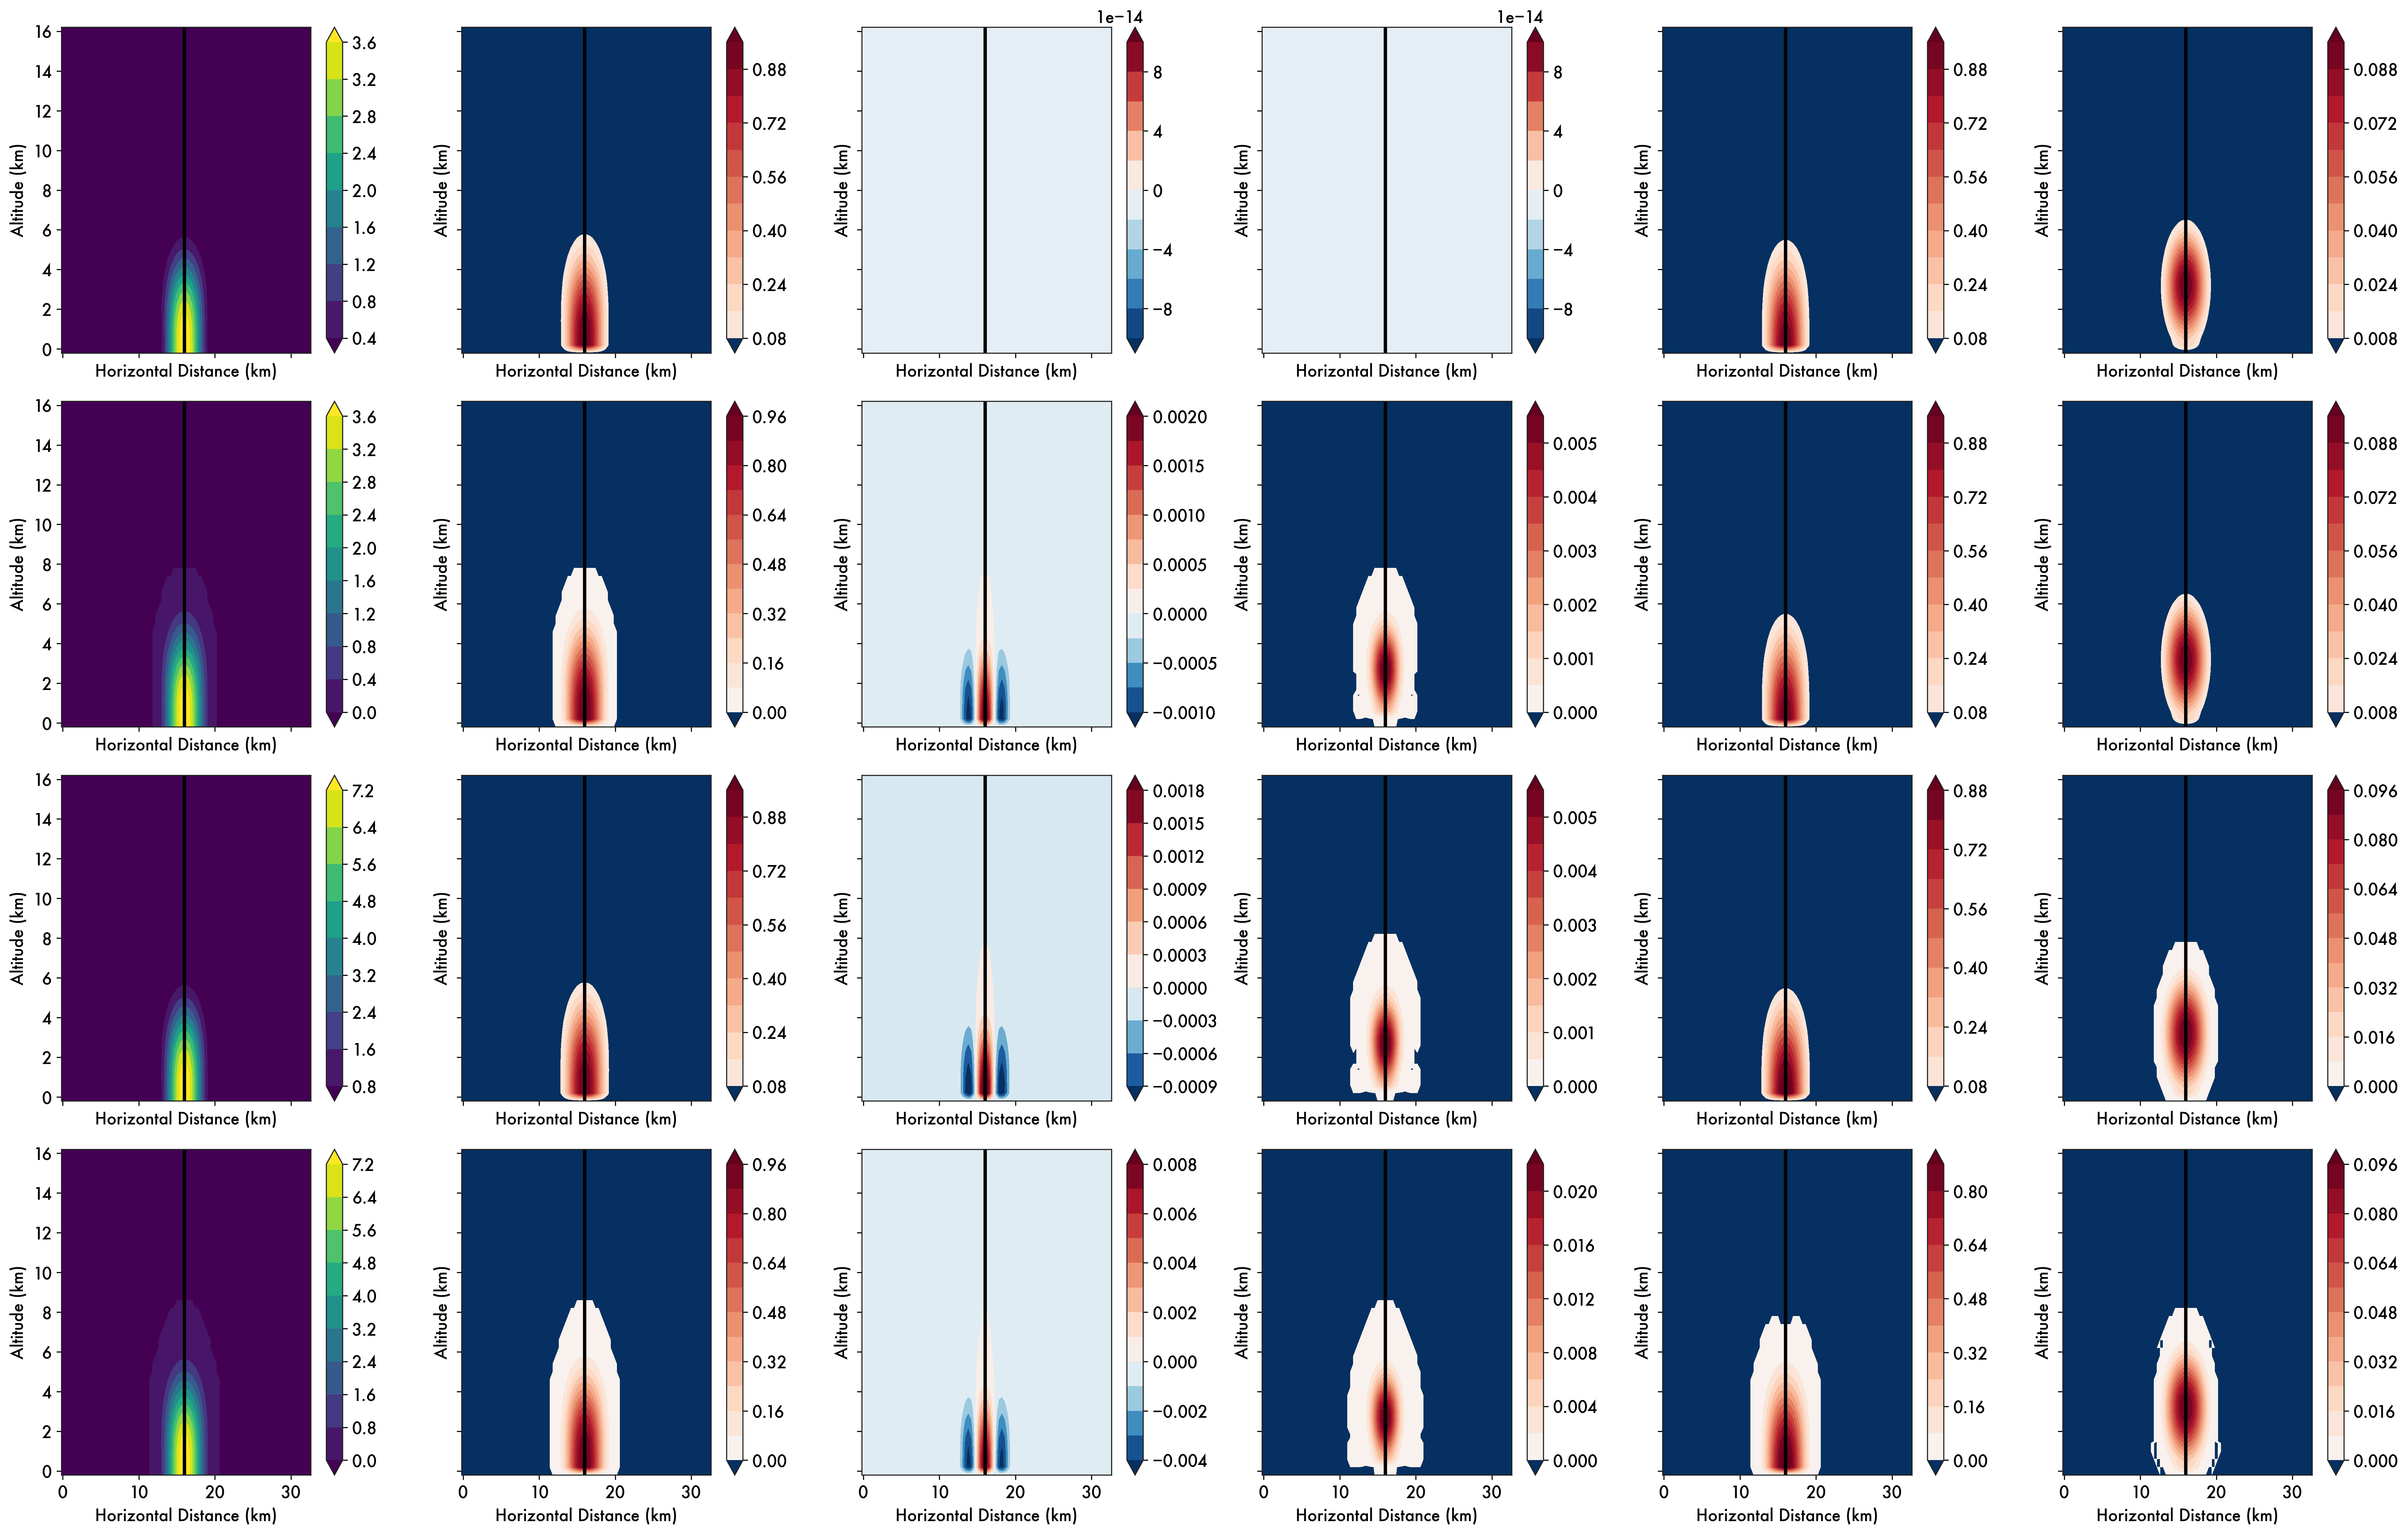

In [223]:
fig, axess = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(25, 16))

v = "WP"
for name, axes in zip([1, 2, 3, 4], axess):
    path = f"{dataPath}/hw4_output_timestep_{name}.txt"

    ds = read_mac_output(path)
    for ax, var in zip(
        axes,
        [
            f"{v}_pres",
            f"{v}_TEND_pres",
            f"{v}_TEND1_pres",
            f"{v}_TEND2_pres",
            f"{v}_TEND3_pres",
            f"{v}_TEND4_pres",
        ],
    ):

        if "TEND" in var:
            norm = mcolors.TwoSlopeNorm(vcenter=0)
            cmap = "RdBu_r"
            levels = 12
        else:
            norm = None
            cmap = None
            levels = 11

        c = ax.contourf(
            ds.x / 1000,
            ds.z / 1000,
            ds[var],
            levels=levels,
            extend="both",
            norm=norm,
            cmap=cmap,
        )
        plt.colorbar(c, ax=ax)

        ax.axvline(16.0)

        ax.set_ylabel("Altitude (km)")
        ax.set_xlabel("Horizontal Distance (km)")

plt.show()

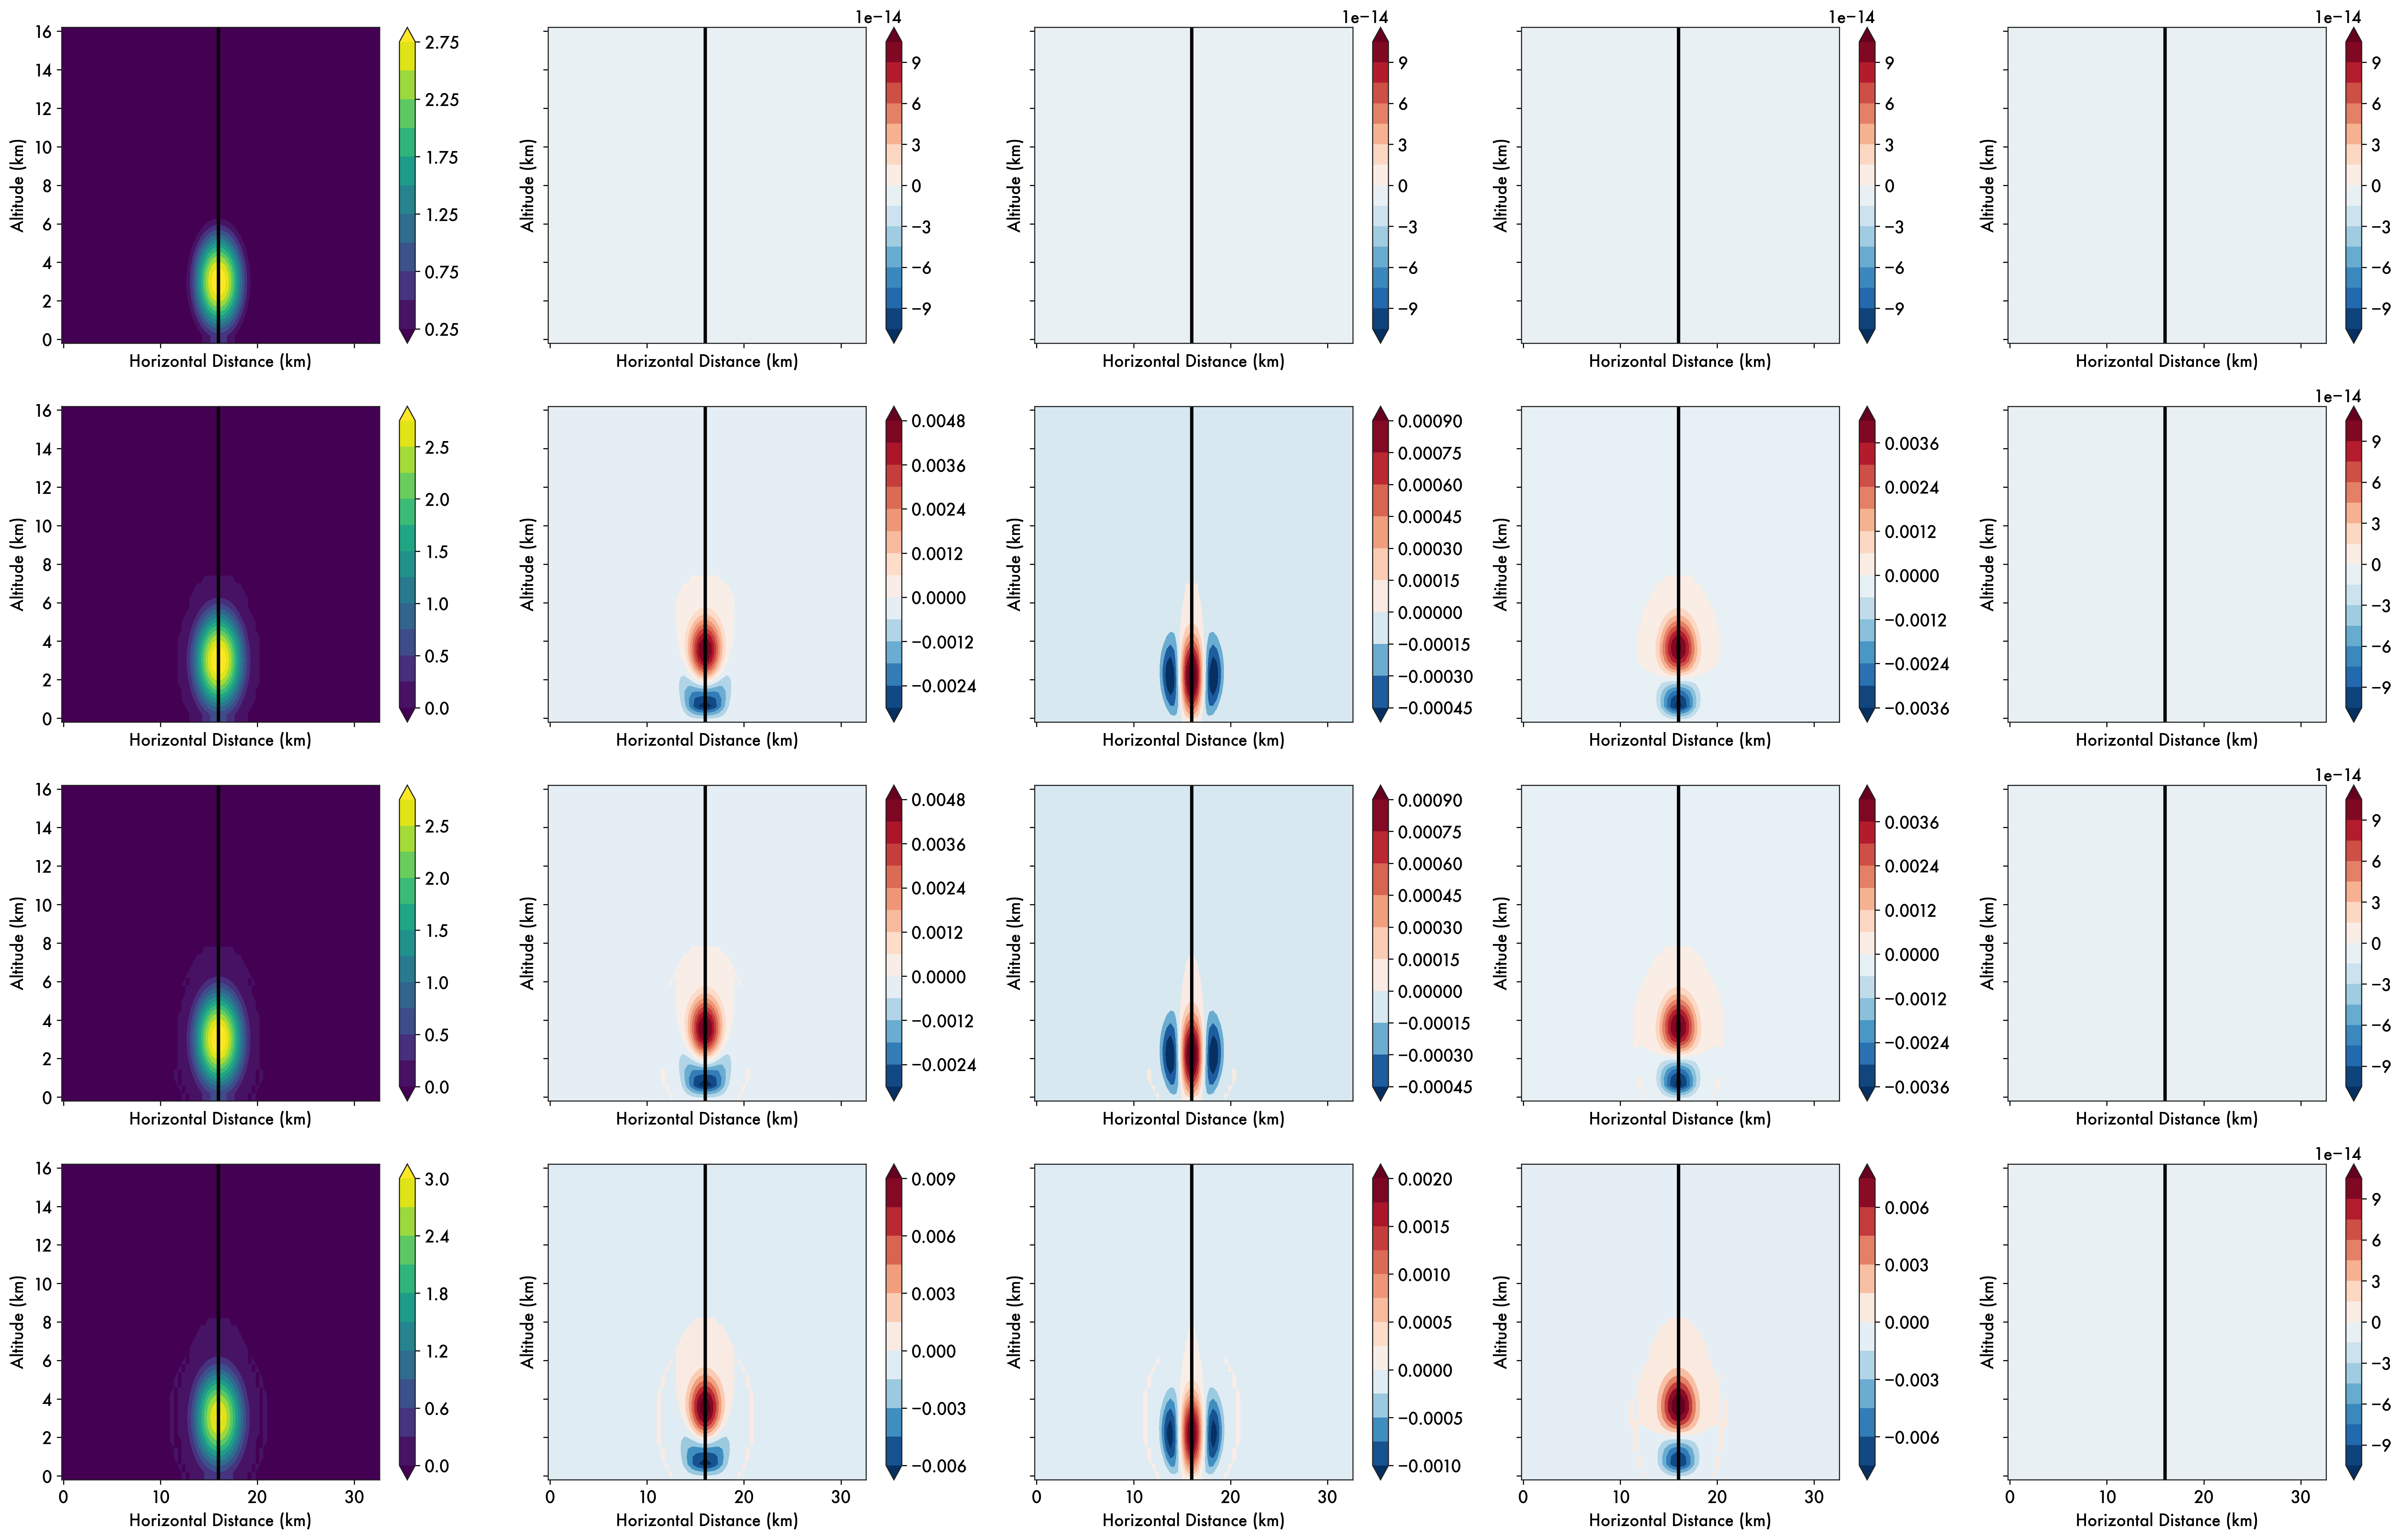

In [234]:
fig, axess = plt.subplots(4, 5, sharex=True, sharey=True, figsize=(25, 16))

v = "THP"
for name, axes in zip([1, 2, 3, 4], axess):
    path = f"{dataPath}/hw4_output_timestep_{name}.txt"

    ds = read_mac_output(path)
    for ax, var in zip(
        axes,
        [
            f"{v}_pres",
            f"{v}_TEND_pres",
            f"{v}_TEND1_pres",
            f"{v}_TEND2_pres",
            f"{v}_TEND3_pres",
        ],
    ):

        if "TEND" in var:
            norm = mcolors.TwoSlopeNorm(vcenter=0)
            cmap = "RdBu_r"
            levels = 13
        else:
            norm = None
            cmap = None
            levels = 11

        c = ax.contourf(
            ds.x / 1000,
            ds.z / 1000,
            ds[var],
            levels=levels,
            extend="both",
            norm=norm,
            cmap=cmap,
        )
        plt.colorbar(c, ax=ax)

        ax.axvline(16)

        ax.set_ylabel("Altitude (km)")
        ax.set_xlabel("Horizontal Distance (km)")

plt.show()

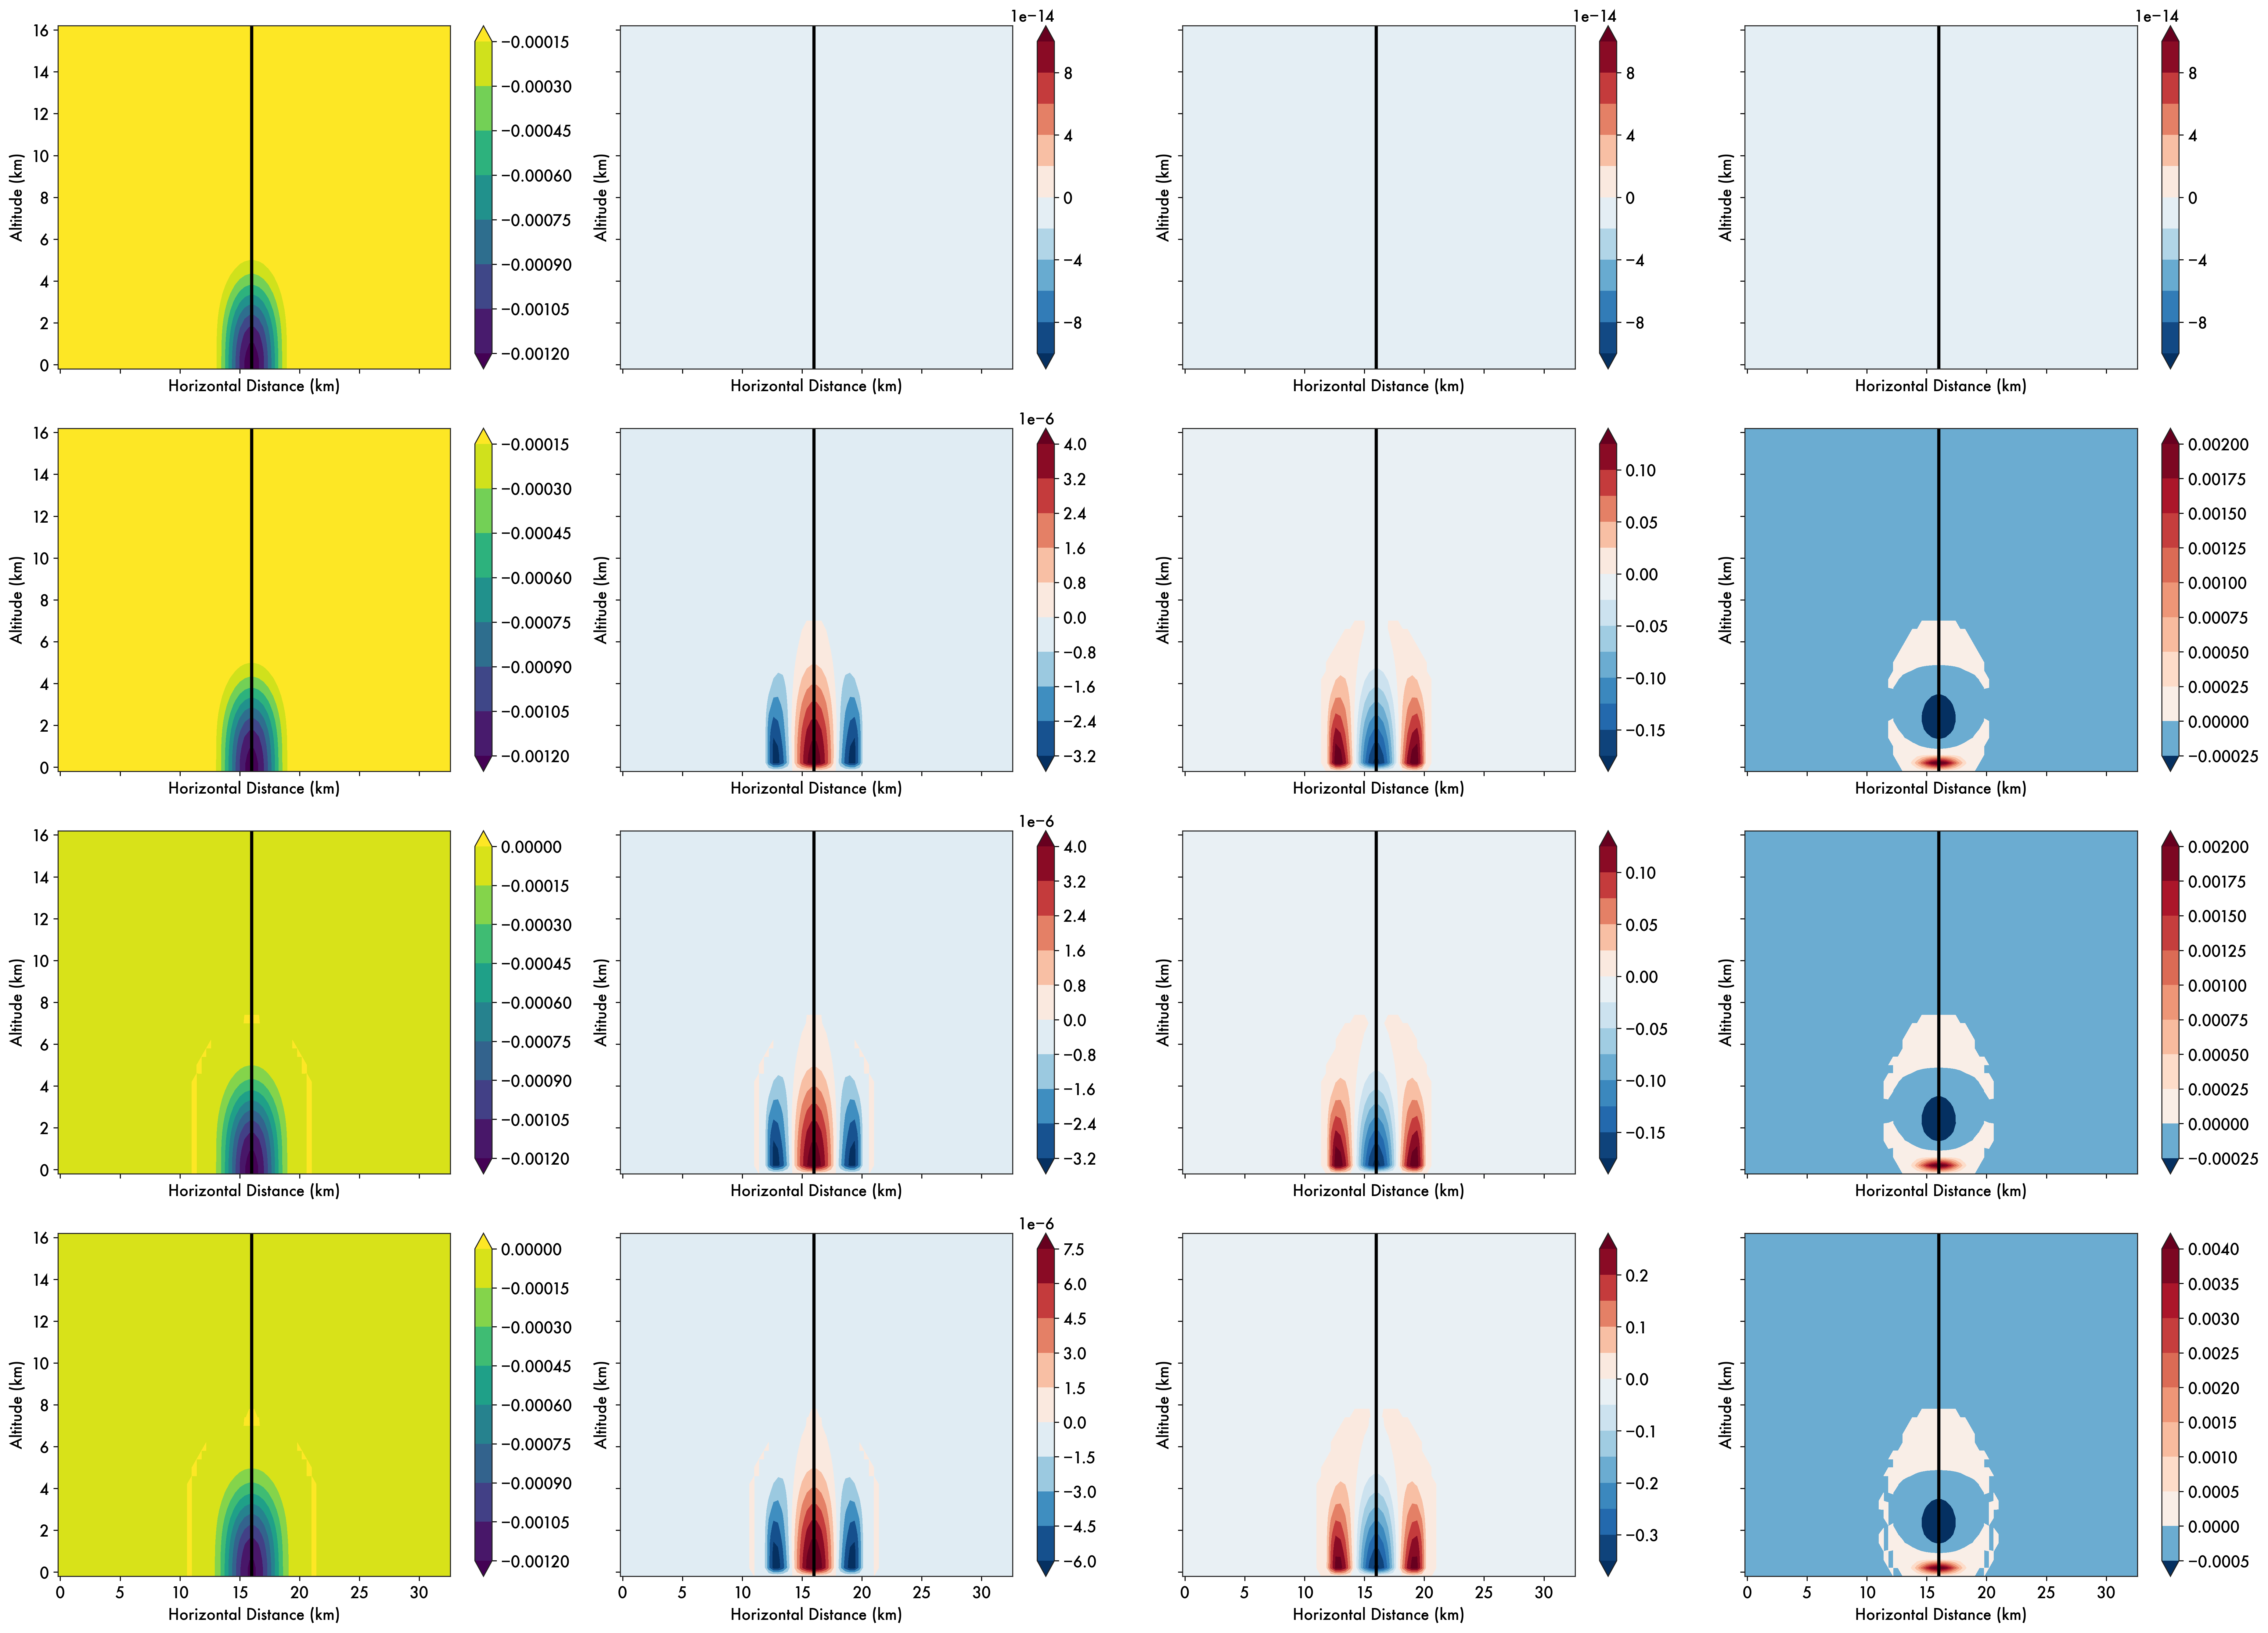

In [225]:
fig, axess = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(25, 18))

for name, axes in zip([1, 2, 3, 4], axess):
    path = f"{dataPath}/hw4_output_timestep_{name}.txt"

    ds = read_mac_output(path)
    for ax, var in zip(
        axes,
        [
            "PIP_pres",
            "PIP_TEND_pres",
            "PIP_TEND1_pres",
            "PIP_TEND2_pres",
        ],
    ):

        if "TEND" in var:
            norm = mcolors.TwoSlopeNorm(vcenter=0)
            cmap = "RdBu_r"
            levels = 12
        else:
            norm = None
            cmap = None
            levels = 11

        c = ax.contourf(
            ds.x / 1000,
            ds.z / 1000,
            ds[var],
            levels=levels,
            extend="both",
            norm=norm,
            cmap=cmap,
        )
        plt.colorbar(c, ax=ax)

        ax.axvline(16)

        ax.set_ylabel("Altitude (km)")
        ax.set_xlabel("Horizontal Distance (km)")

plt.show()

In [231]:
path = f"{dataPath}/hw4_output_timestep_20.txt"

ds = read_mac_output(path)

v = "PIP"
for var in [
    f"{v}_TEND_pres",
    f"{v}_TEND1_pres",
    f"{v}_TEND2_pres",
]:
    print(var)
    print(
        np.max(
            ds[var].isel(x=slice(0, 40)).values
            - ds[var].isel(x=slice(42, 82)).values[::, ::-1]
        )
    )

PIP_TEND_pres
0.0
PIP_TEND1_pres
0.0
PIP_TEND2_pres
0.0


In [230]:
path = f"{dataPath}/hw4_output_timestep_82.txt"

ds = read_mac_output(path)

v = "UP"
for var in [
    f"{v}_TEND_pres",
    f"{v}_TEND1_pres",
    f"{v}_TEND2_pres",
]:
    print(var)
    print(
        np.max(
            ds[var].isel(x=slice(0, 41)).values
            + ds[var].isel(x=slice(42, 84)).values[::, ::-1]
        ),
    )

UP_TEND_pres
0.0
UP_TEND1_pres
0.0
UP_TEND2_pres
0.0


# Task 2

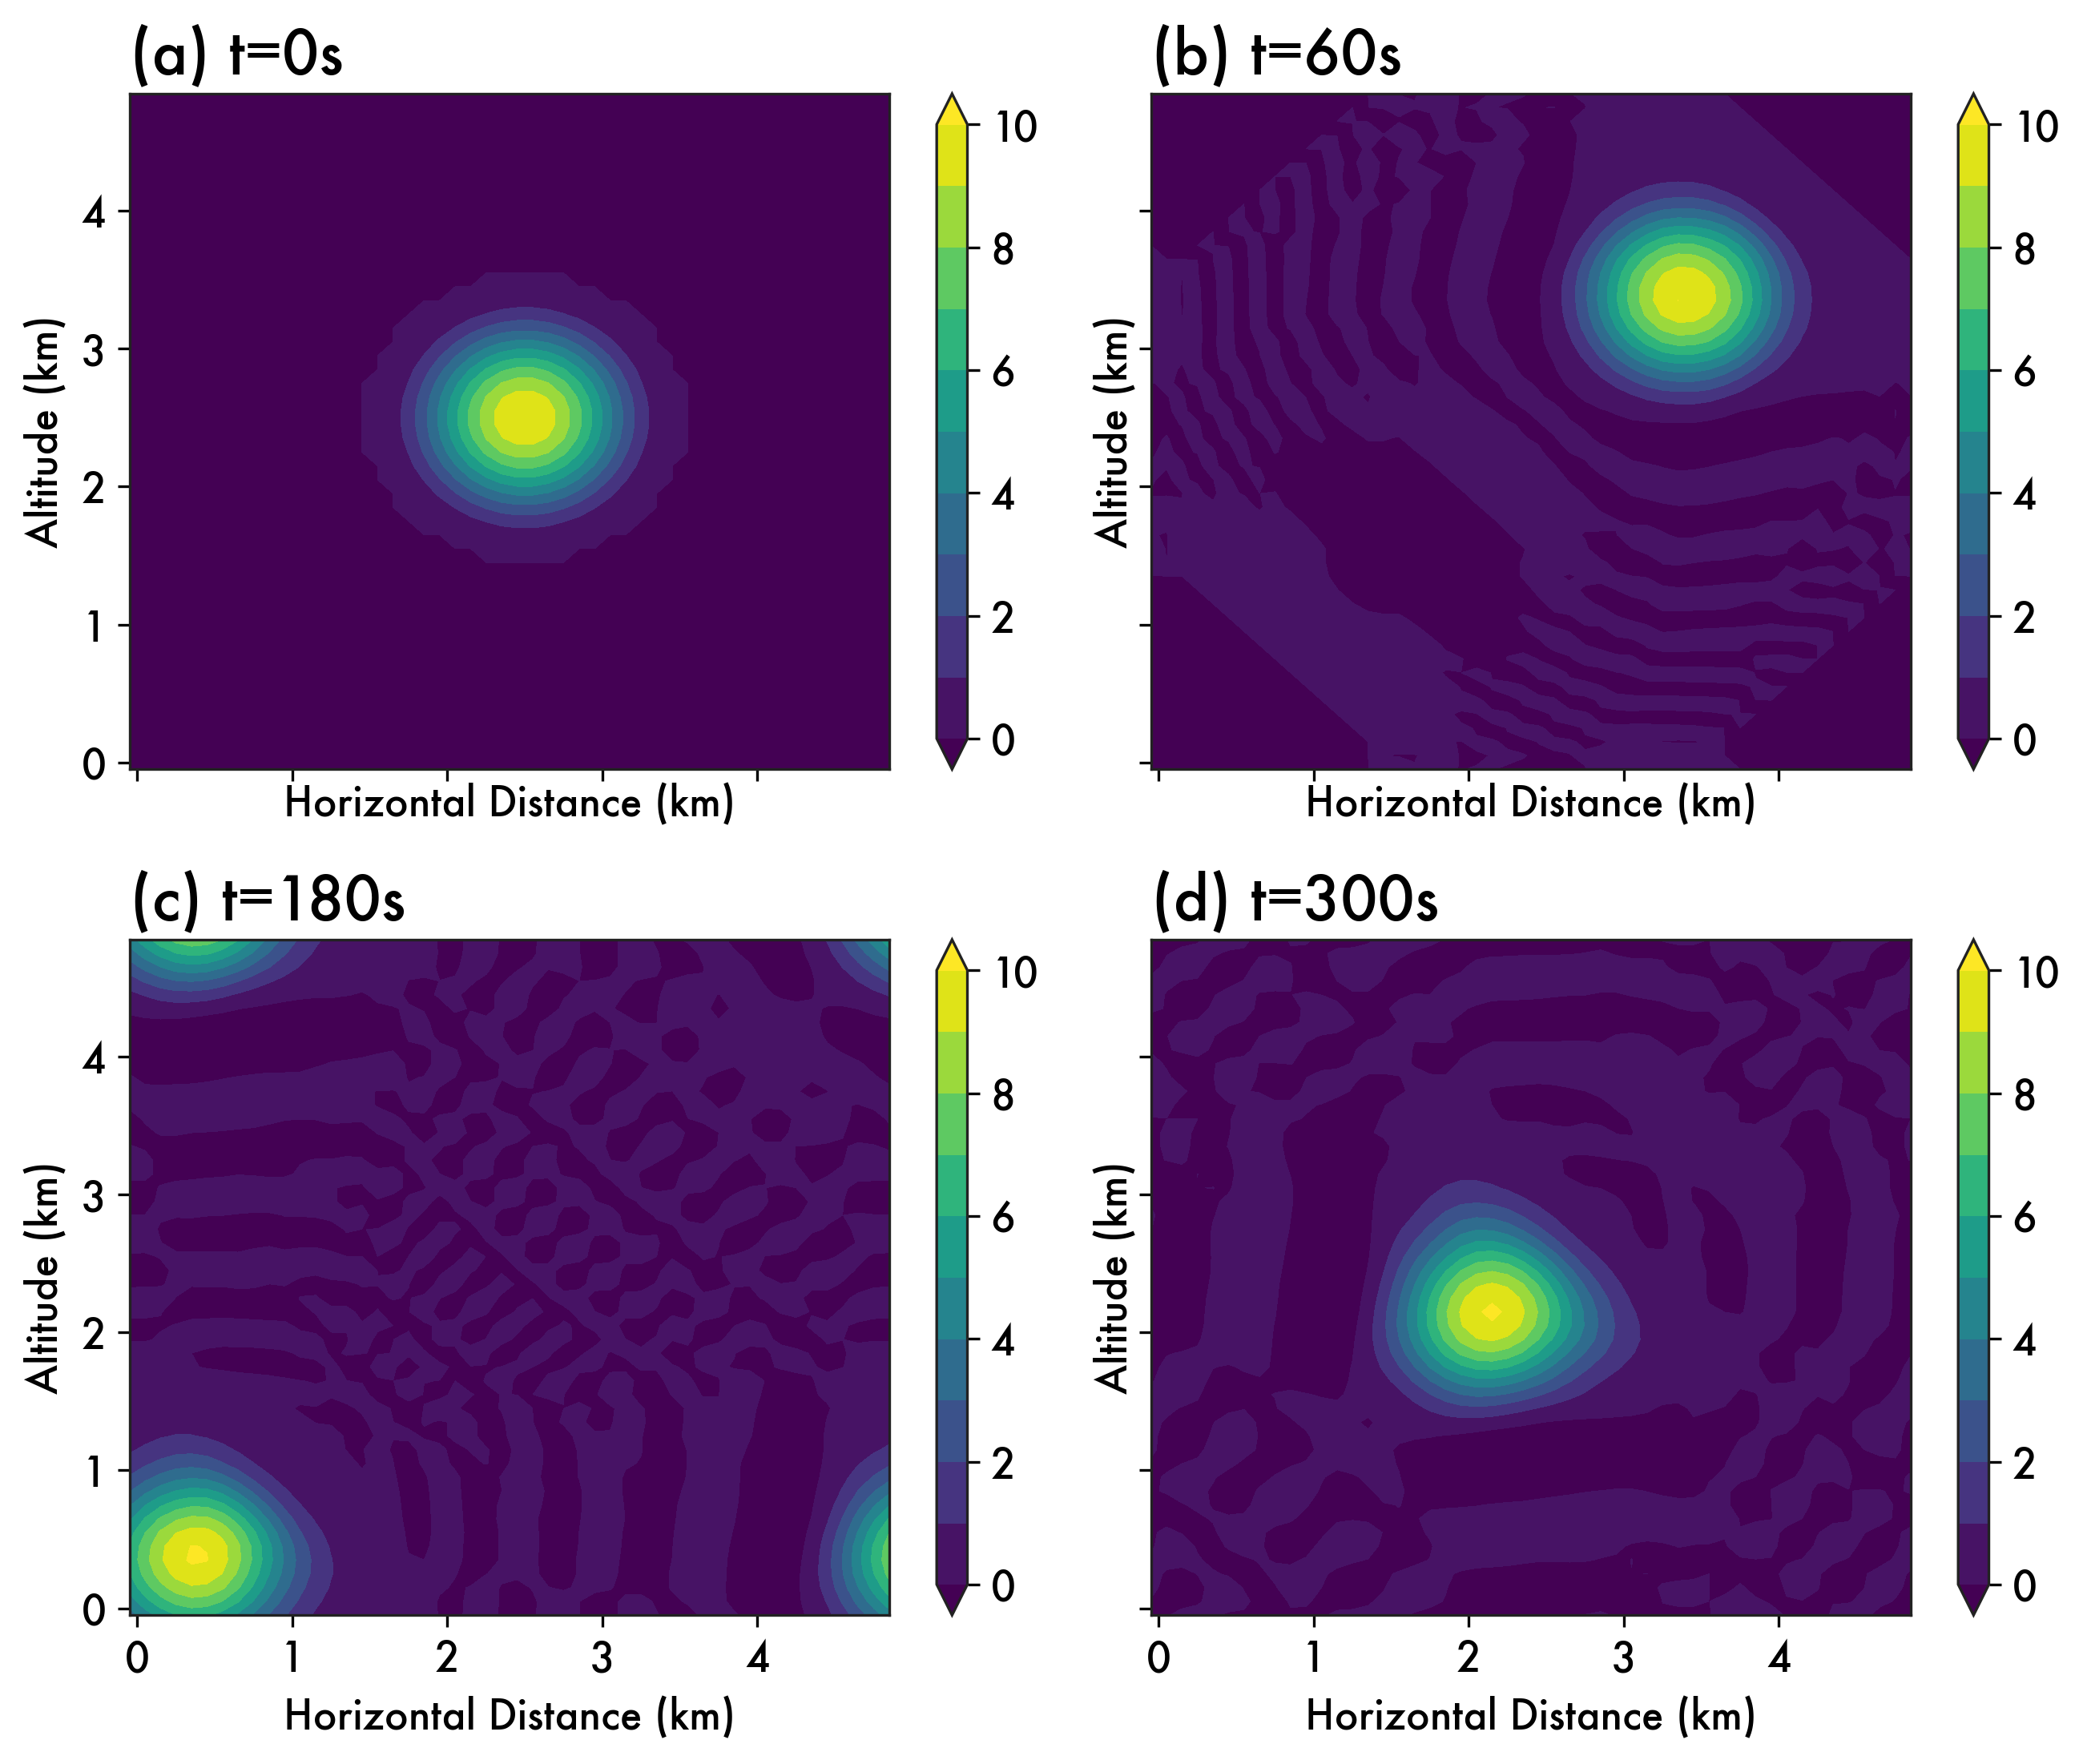

In [215]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 7.5))

axes = axes.flatten()

for i, ax, title in zip(
    [3, 60, 180, 300],
    axes,
    ["(a) t=0s", "(b) t=60s", "(c) t=180s", "(d) t=300s"],
):
    path = f"task2/hw3_output_timestep_{(i//3)}.txt"

    ds = read_mac_output(path)

    if i == 3:
        var = "UP_past"
    else:
        var = "UP_pres"

    c = ax.contourf(
        ds.x / 1000,
        ds.z / 1000,
        ds[var].T,
        levels=np.arange(0, 11, 1),
        extend="both",
    )
    plt.colorbar(c, ax=ax)

    ax.set_ylabel("Altitude (km)")

    ax.set_xlabel("Horizontal Distance (km)")

    ax.set_title(title)